nodes visited   134
cache space     30000034
nodes stored    114
nodes forgotten 0
current depth   0
current node    
role: min
root  : work:       130,    0 won,    0 not lost, INF  not won, INF  lost

role: max
(6, 0): work:       101,    0 won,    0 not lost, INF  not won, INF  lost
(7, 1): work:        28,    0 won,    0 not lost, INF  not won, INF  lost

time 0.00338794575086

(6, 0)(6, 7)
	(0, 3)(5, 0)
		(7, 1)(3, 5)
			(2, 6)(3, 4) p1win
	(1, 3)(5, 0)
		(7, 1)(3, 5)
			(2, 6)(3, 4) p1win
	(1, 5)(5, 6)
		(7, 1)(3, 5)
			(2, 6)(3, 4) p1win
(7, 1)(3, 4)
	(0, 3)(3, 5) p1win
	(1, 3)(5, 0)
		(6, 0)(3, 5) p1win
	(1, 5)(5, 6)
		(6, 0)(3, 5) p1win
	(2, 5)(8, 6)
		(6, 0)(3, 5) p1win


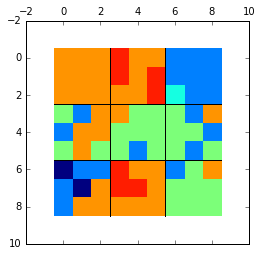

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,1),(0,2),(4,1),(4,2),(8,1),(8,2)]:
    board[x]=1
for o in [(1,1),(1,2),(2,7),(2,8),(6,1),(6,2)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])
player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(1,0),(3,1),(2,4),(8,4),(7,5),(4,8),(3,8),(0,8),(1,8),(3,7),(1,4),(5,4),(6,5),(1,7),(3,3),(2,2),(6,8),
             (0,7),(0,4),(0,5),(1,6),(4,0),(3,2),(0,6),(0,0),(2,1),(8,5),(6,6),(2,0),(8,0),(7,2),(5,7),(8,3),(7,0),
             (5,1),(6,4),(2,3)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()

tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,root = True,epsilon=1.1)
print 'time',time.clock() - t0
print tree